## 6.2. Exploring Relationships

In [35]:
### Import Visualizations and Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os

In [2]:
### Set path
path=r'C:\Users\User\Downloads\Achievement 6'

In [3]:
### Import the cleaned dataset
df=pd.read_csv(os.path.join(path, 'flavors_of_cacao_cleaned.csv'))

In [4]:
df.head()

,Unnamed: 0,Company (Maker-if known),Specific Bean Origin or Bar Name,REF,Review Date,Cocoa Percent,Company Location,Rating,Broad Bean Origin
0,0,A. Morin,Agua Grande,1876,2016,63.0,France,3.75,Sao Tome
1,1,A. Morin,Kpime,1676,2015,70.0,France,2.75,Togo
2,2,A. Morin,Atsane,1676,2015,70.0,France,3.00,Togo
3,3,A. Morin,Akata,1680,2015,70.0,France,3.50,Togo
4,4,A. Morin,Quilla,1704,2015,70.0,France,3.50,Peru


In [5]:
matplotlib.__version__

'3.10.0'

In [30]:
### Create a subset excluding irrelecant columns
sub=df[['Review Date', 'Cocoa Percent', 'Rating']]

In [7]:
sub

,Review Date,Cocoa Percent,Rating
0,2016,63.0,3.75
1,2015,70.0,2.75
2,2015,70.0,3.00
3,2015,70.0,3.50
4,2015,70.0,3.50
...,...,...,...
1789,2015,66.0,3.00
1790,2006,75.0,3.00
1791,2010,70.0,3.75
1792,2016,72.0,3.75


In [31]:
### Create a correlation matrix using pandas
sub.corr()

,Review Date,Cocoa Percent,Rating
Review Date,1.000000,0.038180,0.099815
Cocoa Percent,0.038180,1.000000,-0.164877
Rating,0.099815,-0.164877,1.000000


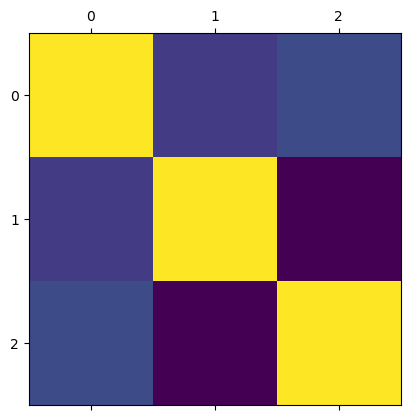

In [32]:
### Create a correlation heatmap using matplotlib
plt.matshow(sub.corr())
plt.show()

<Figure size 600x600 with 0 Axes>

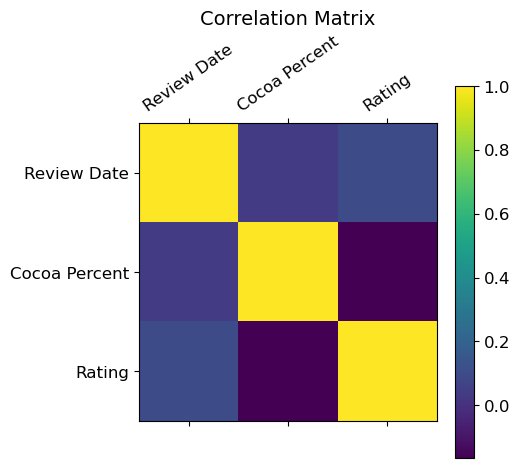

In [10]:
# Add labels, a legend, and change the size of the heatmap

f = plt.figure(figsize=(6, 6))
plt.matshow(sub.corr())  
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=12, rotation=35)
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=12)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=12)
plt.title('Correlation Matrix', fontsize=14)
plt.show()

In [11]:
### Save heatmap
plt.savefig(os.path.join(path, "correlation_heatmap.png"))


<Figure size 640x480 with 0 Axes>

#### There is a negative correlation between Rating and Cocoa Percent. And there is a week positive correlation between Review Date and Cocoa Percent and between Review Date and Rating

### Create a correlation heatmap using seaborn

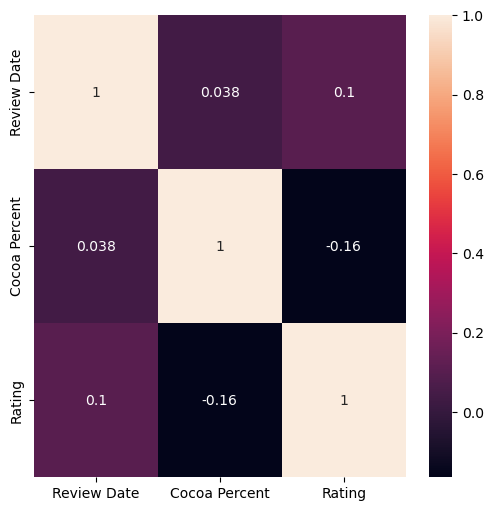

In [13]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(6,6))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) 

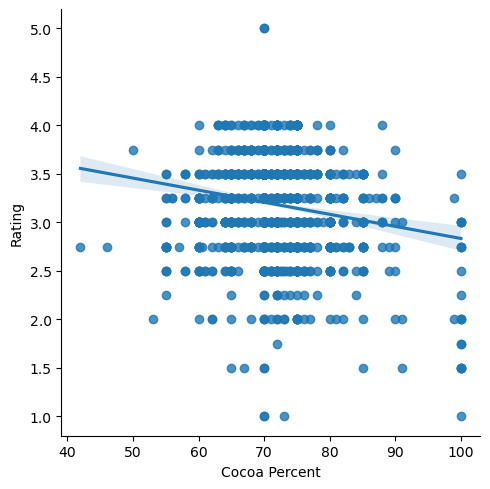

In [24]:
### Creating a scatterplot for the "Cocoa percent" and "Rating" columns
scatterplot=sns.lmplot(x = 'Cocoa Percent', y = 'Rating', data = sub)

In [33]:
### Save the scatterplot
scatterplot.savefig(os.path.join(path, "scatterplot_cocoa_vs_rating.png"))

#### There is a weak negative correlation between Cocoa Percent and Rating, but it is not strong enough to conclude that chocolates with higher cocoa content always receive lower ratings.

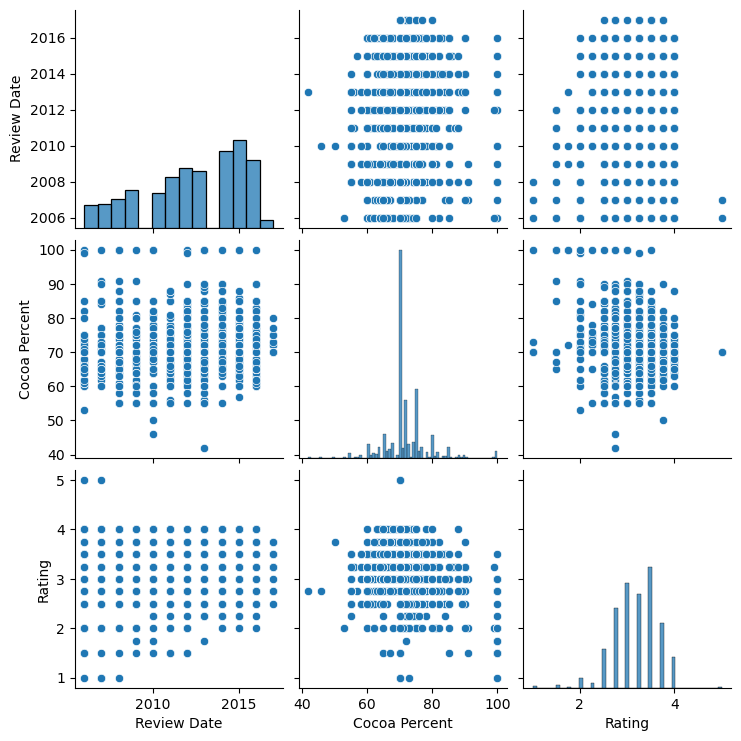

In [34]:
### Create pair plots
g = sns.pairplot(sub)

In [26]:
### save the pair plot 
g.figure.savefig(os.path.join(path,'Pair Plot.png'))

#### Key observations of the Pair Plot:
#### Most reviews were conducted between 2006 and 2015, with a peak around 2013.
#### The frequency of reviews increased over time.
#### The distribution of ratings remains fairly consistent over time.
#### There is no clear trend showing that ratings improved or worsened in later years.

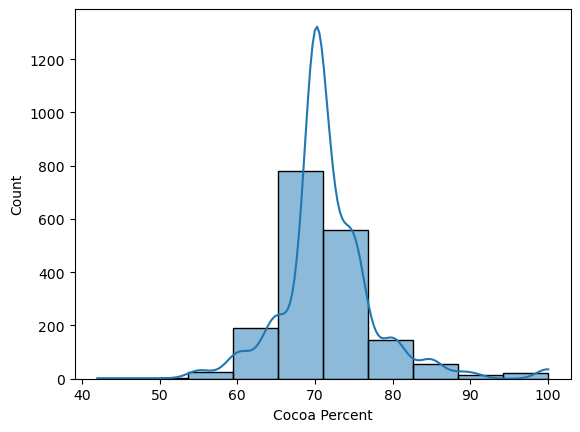

In [17]:
## Creating categorical plot for "Cocoa percent"
m=sns.histplot(sub['Cocoa Percent'], bins = 10, kde = True)

In [18]:
### Saving the categorical plot
m.figure.savefig(os.path.join(path, 'histogram_cocoa Percent.png'))

#### Most chocolates have cocoa percentages between 60% and 75%. The peak of the histogram is around 70% cocoa, meaning most chocolates in this dataset contain around 70% cocoa solids. with fewer chocolates having very low (below 60%) or very high (above 85%) cocoa percentages. This suggests that the dataset is mainly focused on dark chocolates, as these typically fall in the 60% - 75% cocoa range.

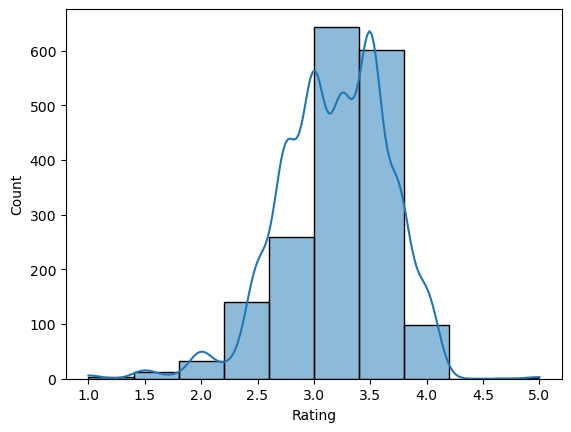

In [19]:
### Creating categorical plot for "Rating"
s=sns.histplot(sub['Rating'], bins = 10, kde = True)

In [20]:
s.figure.savefig(os.path.join(path, "histogram_rating.png"), dpi=300, bbox_inches="tight")

#### Most ratings cluster around 3.0 - 3.5. The highest bars are between 3.0 and 3.5, indicating that most chocolate bars received average ratings. Ratings below 2.5 and above 4.0 are rare. Only a few chocolate bars received ratings below 2.0, indicating that very bad chocolates are uncommon. Similarly, very few chocolates achieved a perfect 5.0 rating, suggesting that exceptionally high-quality chocolates are also rare.

### Going back to the questions generated in the previous exercise, the following question can be answered using the charts above: "•	What’s the relationship between cocoa solids percentage and rating?". The scatterplot above shows a weak negative correlation between Cocoa Percent and Rating, but it is not strong enough to conclude that chocolates with higher cocoa content always receive lower ratings. 

### Hypothesis1: Chocolate Ratings Have Changed Over Time
### Null hypothesis: There is no significant trend in chocolate ratings over the years.
### Alternative hypothesis: Chocolate ratings have increased (or decreased) over time. 

### Hypothesis2: Cocoa Percentage affects ratings
### Null hypothesis: There is no relationship between Cocoa Percantage and Ratings
### Alternative Hypothesis: A higher or lower cocoa percentage affects ratings